In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
df=pd.read_csv('Customer_Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1843,3173-WSSUE,Female,0,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.70,1415.85,No
3554,1077-HUUJM,Female,0,No,Yes,7,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71.05,472.65,No
5638,5143-WMWOG,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.95,19.95,Yes
5327,1270-XKUCC,Female,0,Yes,Yes,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,599.25,No
5955,7169-YWAMK,Male,0,Yes,Yes,72,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),68.40,4855.35,No


In [30]:
#CustomerID is useless so drop it.
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [63]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x:float(x) if x!=' ' else None)

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [32]:
#easier way to do the same as above
#df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')

In [33]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [34]:
#Now I want to find where there are NULL values exactly in TotalCharges
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [35]:
df.shape

(7043, 20)

In [67]:
df['TotalCharges'].isnull().sum()
#Removing NULL from TotalCharges column
df.dropna(subset=['TotalCharges'],inplace=True)
df.shape


(7032, 20)

In [68]:
df.shape

(7032, 20)

In [69]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [53]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

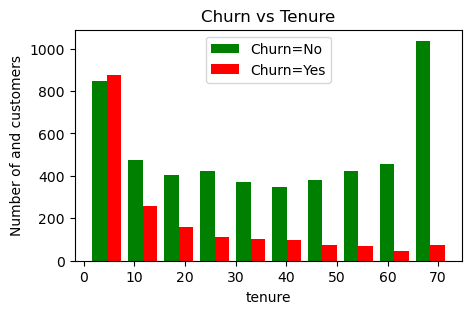

In [80]:
#tenure of people leaving vs not leaving
tenure_no=df[df.Churn=='No'].tenure
#print(tenure_no)
tenure_yes=df[df.Churn=='Yes'].tenure
plt.figure(figsize=(5,3))
plt.hist([tenure_no,tenure_yes],color=['green','red'],label=["Churn=No","Churn=Yes"])

plt.xlabel("tenure")
plt.ylabel("Number of and customers")
plt.title('Churn vs Tenure')
plt.legend()

In [85]:
#Checking out yes/no columns,only consider col with type object and print unique values for each column
def print_unique_vals(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col}:{df[col].unique()}')

In [86]:
print_unique_vals(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [87]:
#No internet service is the same as no so replace
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [88]:
print_unique_vals(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [89]:
#Converting yes and No columns to 1 and 0
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [90]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [92]:
#Replace gender col also with 1 & 0

df['gender'].replace({"Female":1,"Male":0},inplace=True)
for col in df:
    print(f'{col}:{df[col].unique()}')


gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [96]:
#Now I will one hot encode categorical columns
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df1.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [97]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6558,0,0,0,0,16,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3894,1,0,1,0,68,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,1
3045,1,0,1,0,48,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
2627,1,0,0,0,33,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3145,1,0,0,0,4,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [99]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [100]:
#Scaling all values 0 to 1
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])
df1.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
951,1,0,0,0,0.098592,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2083,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2602,1,0,1,1,0.887324,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
5049,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [101]:
#Model prep
X=df1.drop('Churn',axis='columns')
y=df1['Churn']


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


In [103]:
X_train.shape

(5625, 26)

In [104]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4954,0,0,0,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3918,0,0,1,1,0.267606,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5406,0,0,1,1,0.985915,1,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1637,0,0,0,0,0.915493,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5191,1,0,1,1,0.309859,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [106]:
#Model
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100


/Users/gnsaivarun/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - accuracy: 0.7312 - loss: 0.6012
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.7864 - loss: 0.4376
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.7893 - loss: 0.4289
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.7789 - loss: 0.4400
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.7962 - loss: 0.4142
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.7904 - loss: 0.4238
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.8080 - loss: 0.4123
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.8009 - loss: 0.4242
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.8023 - loss: 0.4198
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.7888 - loss: 0.4324
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8021 - loss: 0.4125
Epoch 12/100
176/176 ━━━━━━━━━━

In [107]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.7776 - loss: 0.4212


[0.43257519602775574, 0.7803837656974792]

In [109]:
yp=model.predict(X_test)
yp

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


array([[0.01873611],
       [0.00222006],
       [0.2121736 ],
       ...,
       [0.03152375],
       [0.07605762],
       [0.3749865 ]], dtype=float32)

In [110]:
y_pred=[]
for ele in yp:
    if ele>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)    

In [114]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [115]:
y_test[:10]

5401    0
1681    0
2076    0
3359    0
6629    0
149     0
1730    1
5971    0
3050    1
1183    0
Name: Churn, dtype: int64

In [116]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1046
           1       0.57      0.58      0.58       361

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.78      0.78      1407



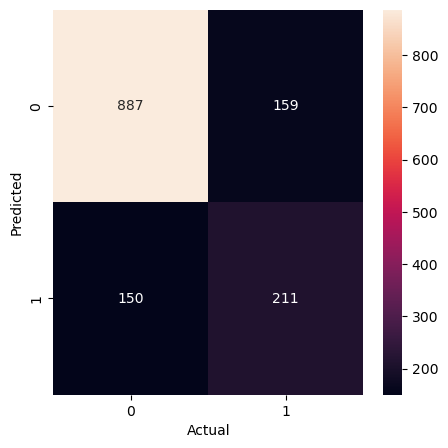

In [117]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.show()

Accuracy

In [119]:
#accuracy=crct predictions/total predictions will get the same as the accuracy of classification report
round((887+211)/(887+211+150+159),2)

0.78

Precision

In [122]:
#Precision for class 0:Correct prediction of class 0/total predicted as class 0
# (same value as in classification report)
round(887/(887+159),2)


0.85

Recall

In [121]:
#Truth of 0/total predicted as 0
round(887/(887+150),2)

0.86